## **Redes Neuronales y Máquinas de Aprendizaje**

Procesamiento de Lenguaje Natural (NLP) es un conjunto de técnicas y algoritmos que utilizan computadoras para analizar y comprender el lenguaje humano natural. NLP puede utilizarse para resolver una variedad de problemas, por ejemplo:

* Identificación de Temas: ¿Cuáles son los temas, personas, empresas o lugares discutidos en este texto?
* Análisis de Sentimientos: ¿Este texto transmite un sentimiento positivo, negativo o neutral sobre una entidad o tema?
* Traducción Automática: Convertir el input de un idioma a otro, por ejemplo, de inglés a francés.
* Texto a Voz: Convertir el input hablado en su forma escrita.
* Comprensión e Interpretación: ¿Qué información responderá a una pregunta específica?

## **Ejercico 1: Procesamiento del Lenguaje Natural (PLN)**

El Procesamiento del Lenguaje Natural (PLN) es un conjunto de técnicas y algoritmos que utilizan computadoras para analizar el lenguaje humano natural. El PLN se puede utilizar para resolver una variedad de problemas, por ejemplo:

*   Identificación de Temas: ¿Cuáles son los temas, personas, empresas o lugares discutidos en este texto?
*   Análisis de Sentimientos: ¿Este texto transmite un sentimiento positivo, negativo o neutral sobre una entidad o tema específico?
* Traducción Automática: Convierte la entrada de un idioma a otro, por ejemplo, de inglés a francés.
* Texto a Voz: Convierte la entrada hablada en su forma escrita.
Comprensión e Interpretación: ¿Qué información responderá una pregunta específica?

Este ejercicio te enseñará los conceptos básicos del PLN utilizando redes neuronales, enfocándose en la clasificación de texto.
* Primero, aprenderás algunas formas comunes de codificar/representar texto como vectores/matrices, para que una red neuronal pueda usarlo como entrada.
* Luego, utilizarás esas representaciones para codificar un conjunto de datos de textos y clasificarlos.
* Finalmente, aprenderás a utilizar algunos modelos más avanzados de redes neuronales para generar texto.

Antes de comenzar, también deberás descargar e importar al Collab el archivo 'wiki.simple.vec', que contiene las representaciones de palabras que se usarán en este ejercicio.

### Literatura

Las siguientes secciones en el [libro de deeplearningbook.org](https://www.deeplearningbook.org/) son relevantes para este ejercicio.

* 12.4 - Procesamiento del Lenguaje Natural
   - (más detalles sobre las subsecciones ya que no todas las subsecciones de PLN son útiles para el curso)

Lectura opcional para más detalles sobre RNNs:
* 10 - Modelado de Secuencias: Redes Recurrentes y Recursivas


**Celda 1: Instalación de Dependencias**

In [ ]:
# Si ya tienes instaladas las librerías necesarias, comenta la siguiente línea:
!pip install torch torchvision torchaudio torchtext gensim matplotlib scikit-learn


**Celda 2: Importación de Librerías**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchtext
from torchtext.datasets import AG_NEWS
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import matplotlib.pyplot as plt
import numpy as np
import random
import gensim
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns

# 1. Convertir Oraciones en Matrices

Las redes neuronales solo pueden procesar números, por lo que cualquier texto que queramos procesar debe convertirse en números, es decir, vectores.

## Tipos de Representaciones de Texto:
- **Bag of Words (BoW)**: Cuenta cuántas veces aparece cada palabra en un texto.
- **Word2Vec (Skip-gram)**: Crea vectores complejos que representan palabras en un espacio de múltiples dimensiones.

## Preprocesamiento del Texto:
Antes de convertir el texto en vectores, realizamos varios pasos:

1. **Limpieza**: Remover partes innecesarias del texto, como caracteres especiales y convertir todas las letras a minúsculas.
   - Ejemplo: `"¿A Michael le gustan 99 gatos?"` → `"a michael le gustan 99 gatos"`
   
2. **Tokenización**: Dividir el texto en partes más pequeñas, como palabras.
   - Ejemplo: `"a michael le gustan 99 gatos"` → `["a", "michael", "le", "gustan", "99", "gatos"]`

3. **Lematización**: Convertir palabras a su forma base.
   - Ejemplo: `["a", "michael", "le", "gustan", "99", "gatos"]` → `["a", "michael", "le", "gustar", "99", "gato"]`

4. **Indexación**: Asignar un número a cada palabra.
   - Ejemplo: `["a", "michael", "le", "gustar", "99", "gato"]` → `[1, 2, 3, 4, 5, 6]`

5. **Embeddings**: Convertir las palabras en vectores numéricos que la red neuronal pueda entender.

Para este ejercicio, solo necesitas enfocarte en **tokenización**, **indexación** y **embeddings**.

## Conjuntos de Datos Utilizados:
- **"Cat on the Mat"**: Un pequeño conjunto de datos para visualizar y entender los métodos.
- **AG News**: Un gran conjunto de datos con extractos de artículos de noticias de diferentes temas, útil para entrenar clasificadores de noticias.


**Celda 3: Creación del Dataset "Cat on the mat"**

In [ ]:
import itertools

animals = ['cat','dog','goat','elephant','eagle','zebra','rhino', 'hippo']
actions = ['sat','stood','jumped','slept']
furniture = ['mat','rug','sofa','bed']

# Generar todas las combinaciones de animal, acción y mueble
animal_corpus = [f'el {x[0]} {x[1]} en el {x[2]}' for x in itertools.product(animals, actions, furniture)]
vocabulary_size = len(animals) + len(actions) + len(furniture) + 2

print(f'Hay {len(animal_corpus)} oraciones en el corpus, con un vocabulario de {vocabulary_size} palabras')
print(f'La primera oración en el corpus es "{animal_corpus[0]}"')


**Celda 4: Descarga y Preparación del Dataset AG News**

In [ ]:
# Descargar, tokenizar e indexar el conjunto de datos AG News
#Se hace en una celda individual porque puede tardar algo de tiempo

ag_train, ag_test = AG_NEWS(ngrams=1, vocab=None, root='data')

In [ ]:
# Nuestras etiquetas son números, aquí se muestra qué tipo de artículo representan
ag_labels = {
    0 : 'Mundo',
    1 : 'Deportes',
    2 : 'Negocios',
    3 : 'Ciencia/Tecnología'
}

# 'vocab' es una clase que nos dará el índice de cualquier palabra/token (vocab['hola'] = <número>)
vocab = ag_train.get_vocab()

# 'nr2word' es una lista que contiene las palabras para cada índice (nr2word[5678] = <palabra/token>)
nr2word = vocab.itos

# Función para convertir un tensor en texto
def tensor2text(tensor):
    return ' '.join([nr2word[index] for index in tensor])

# Función para convertir texto en tensor indexado
def text2tensor(text):
    tensor = torch.Tensor([vocab[token] for token in text.split(' ')])
    return tensor.int()

# Ver qué contiene el conjunto de datos
ag_train_len = len(ag_train) # Número de entradas en AG_NEWS

print(
    f'ag_train contiene {len(ag_train)} fragmentos de texto etiquetados '
    f'y tiene un tamaño de vocabulario de {len(vocab)}\n'
    f'En el índice 0, ag_train contiene:\n{ag_train[0]}\n'
    f'que tiene la etiqueta {ag_train[0][0]} que se traduce en "{ag_labels[ag_train[0][0]]}" '
    f'y el fragmento de texto se traduce en:\n{tensor2text(ag_train[0][1])}'
)

**Celda 5: Implementación del Tokenizador Simple y la Clase SimpleVocabulary**



Este nuevo conjunto de textos necesita ser tokenizado e indexado antes de usarse.

**Ejercicio 1.1:** Escribe una función de tokenización y una clase de vocabulario que te permita obtener el índice de una palabra y la palabra correspondiente a un índice.


In [ ]:
def simple_tokenizer(text):
    '''
    Toma un texto y devuelve una lista de palabras individuales
    Args:
        text (str): El texto a tokenizar
    Returns ([str]): Lista de palabras
    '''
    # ESCRIBE UN TOKENIZADOR (Sugerencia: usa la función 'split')
    return text.split()

class SimpleVocabulary():

    def __init__(self, corpus):
        '''
        Toma un corpus, lo tokeniza y crea diccionarios para índices y palabras
        Args:
            corpus ([str]): Lista de textos no tokenizados
        '''
        self.token2index = {}
        self.index2token = []
        current_index = 0
        for text in corpus:
            for token in simple_tokenizer(text):
                if token not in self.token2index:
                    self.token2index[token] = current_index
                    self.index2token.append(token)
                    current_index += 1

    def get_index(self, token):
        '''
        Toma una palabra y devuelve su índice
        Args:
            token (str): Una palabra
        Returns (int): Índice de la palabra
        '''
        return self.token2index.get(token, -1) # Devuelve -1 si no está

    def get_token(self, index):
        '''
        Toma un índice y devuelve la palabra correspondiente
        Args:
            index (int): Un índice
        Returns (str): La palabra correspondiente
        '''
        if index < len(self.index2token):
            return self.index2token[index]
        return "<UNK>"

    def __len__(self):
        '''
        Devuelve el número de palabras en el vocabulario
        '''
        return len(self.index2token)

def index_sequence(sequence, vocabulary):
    '''
    Toma una lista de palabras y un vocabulario, y devuelve una lista de índices
    Args:
        sequence ([str]): Lista de palabras
        vocabulary (SimpleVocabulary): El vocabulario
    Returns ([int]): Lista de índices
    '''
    return [vocabulary.get_index(token) for token in sequence]


**Celda 6: Verificación del Tokenizador y SimpleVocabulary**

In [ ]:
animal_vocab = SimpleVocabulary(animal_corpus)
test_sequence = 'el gato se puso en la estera'
tokenized_sequence = simple_tokenizer(test_sequence)
print(tokenized_sequence)
indexed_sequence = index_sequence(tokenized_sequence, animal_vocab)
print(indexed_sequence)
assert len(tokenized_sequence) == 6, 'La secuencia tokenizada debe contener todas las palabras de la secuencia original'
assert len(tokenized_sequence) == len(indexed_sequence), 'La secuencia indexada debe tener la misma longitud que la secuencia tokenizada'
assert indexed_sequence[0] == indexed_sequence[4], 'El índice de la misma palabra debe ser igual'
assert len(animal_vocab) >= 18, 'Debe haber al menos 18 palabras en el vocabulario (más si tienes palabras fuera de vocabulario)'
print('¡El tokenizador simple y SimpleVocabulary parecen estar bien implementados!')


## Bag of Words (BoW)

Bag of Words (BoW) es una forma sencilla de representar texto. Cada texto se representa como un vector donde cada posición corresponde a una palabra del vocabulario y el valor indica cuántas veces aparece esa palabra en el texto.

Ejemplo:

Vocabulario: ["el", "gato", "perro", "se", "puso", "en", "la", "estera"]

Texto: "el gato se puso en la estera"

Representación BoW: [1, 1, 0, 1, 1, 1, 1, 1]

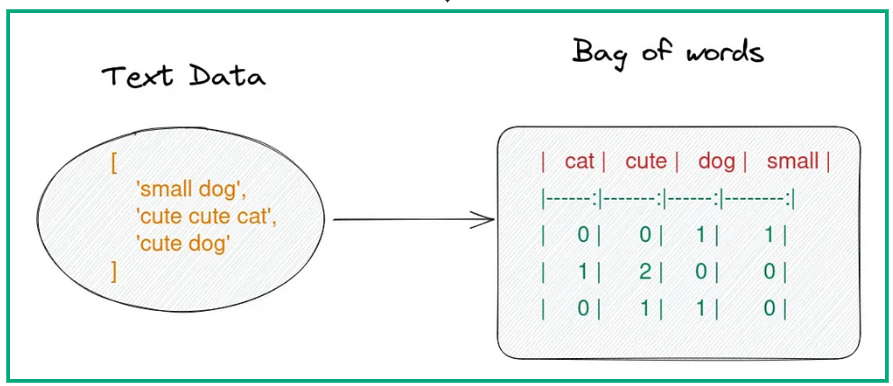


**Ejercicio 1.2**: Crea un codificador BoW que tome una representación indexada de un texto y devuelva su representación BoW. ¿Qué tan dispersos son los vectores (cuántos elementos son cero)? ¿Por qué ocurre esto?

**Celda 7: Implementación del BoW Embedder**

In [ ]:
def bow_embedder(tensor, vocab_length):
    '''
    Toma un tensor y el tamaño del vocabulario, y devuelve la representación BoW
    Args:
        tensor (torch.Tensor): Tensor de palabras representadas por su índice en el vocabulario
        vocab_length (int): Número de palabras en el vocabulario
    Returns (torch.Tensor): Tensor con la representación BoW
    '''
    ## AÑADE CÓDIGO AQUI
    ...


**Celda 8: Verificación del BoW Embedder**

In [ ]:
vocab_length = len(vocab)

sentence_1 = 'el gato baila bien por un rato'
sentence_2 = 'por un rato el pequeño gato baila bien'
sentence_3 = 'el perro se sienta por un rato'
sentence_4 = 'el gato y el perro'

sentence_1_indexed = text2tensor(sentence_1)
sentence_2_indexed = text2tensor(sentence_2)
sentence_3_indexed = text2tensor(sentence_3)
sentence_4_indexed = text2tensor(sentence_4)

sentence_1_bow = bow_embedder(sentence_1_indexed, vocab_length)
sentence_2_bow = bow_embedder(sentence_2_indexed, vocab_length)
sentence_3_bow = bow_embedder(sentence_3_indexed, vocab_length)
sentence_4_bow = bow_embedder(sentence_4_indexed, vocab_length)

# Comprobaciones
assert isinstance(sentence_1_bow, torch.Tensor), 'La representación BoW debe ser un tensor'
assert len(sentence_1_bow) == vocab_length, 'La longitud de BoW debe ser igual al tamaño del vocabulario'
assert torch.all(sentence_1_bow == sentence_2_bow), 'Textos con las mismas palabras deben tener la misma representación BoW'
assert torch.any(sentence_1_bow != sentence_3_bow), 'Textos con palabras diferentes deben tener representaciones BoW distintas'
assert sum(sentence_1_bow) == len(sentence_1_indexed), 'La suma de BoW debe ser igual al número de palabras en el texto'
assert max(sentence_4_bow) == 2, 'La representación BoW debe contar las ocurrencias de cada palabra'

print('¡El codificador BoW parece estar bien implementado!')


**Celda 9: Visualización de BoW**

Antes de entrenar una red neuronal con BoW, veamos cómo se ve usando el conjunto de datos "Cat on the Mat".

In [ ]:
## Let's take a sentence and create the BoW representation for it
animal_vocab = SimpleVocabulary(animal_corpus) # Crear vocabulario
test_sequence = 'el gato se puso en la estera' # Crear la oración
tokenized_sequence = simple_tokenizer(test_sequence) # Tokenizar la oración
indexed_sequence = torch.Tensor(index_sequence(tokenized_sequence, animal_vocab)) # Indexar y convertir a tensor
bow_sequence = bow_embedder(indexed_sequence, len(animal_vocab)) # Crear la representación BoW

print(f'La oración \n"{test_sequence}"\nse representa como BoW \n{bow_sequence}\n')


**Celda 10: Creación del BoWDataset y DataLoaders**

Ahora que tenemos una forma de representar nuestras oraciones, usémosla para entrenar un clasificador de noticias con el conjunto de datos AG News.

**Ejercicio 1.3**: Crea una red neuronal y los ciclos de entrenamiento y prueba, logrando al menos un 80% de precisión en el conjunto de prueba.



In [ ]:
# Creamos nuestro propio dataset para cargar los textos embebidos con BoW
class BoWDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, embedder):
        self.dataset = dataset
        self.embedder = embedder

    def __getitem__(self, index):
        return self.dataset[index][0], self.embedder(self.dataset[index][1], len(vocab))

    def __len__(self):
        return len(self.dataset)

bow_train_data = BoWDataset(ag_train, bow_embedder)
bow_test_data = BoWDataset(ag_test, bow_embedder)
bow_trainloader = DataLoader(bow_train_data, batch_size=1000, shuffle=True)
bow_testloader = DataLoader(bow_test_data, batch_size=1000, shuffle=False)

**Celda 11: Creación de la Red Neuronal para Entrenar**

In [ ]:

## CREAR UNA RED NEURONAL PARA ENTRENAR
#network = nn.Sequential(
#    ... # PISTA: Queremos que nuestra entrada sea del tamaño de nuestra incrustación BoW y nuestra salida sea las diferentes clases posibles.
#)


**Celda 12: Definición del Optimizador, Función de Pérdida y Ciclo de Entrenamiento**

In [ ]:
# Usar el optimizador Adam
optimizer =

# Función de pérdida adecuada para clasificación de múltiples clases
loss_function =

epochs = 1 # El conjunto de datos es muy grande, por lo que una época debería ser suficiente para nuestro propósito

for epoch in range(epochs):
    # For each batch of data (since the dataset is too large to run all data through the network at once)
    for batch_nr, (labels, data) in enumerate(bow_trainloader):
       ## ESCRIBE EL CÓDIGO DE ENTRENAMIENTO AQUÍ
       #...


        # Predecir para cada texto representado por BoW en el lote a qué clase pertenecen
        prediction =

        # Calcula la pérdida de la predicción comparándola con la salida esperada
        loss =

        # Backpropagate the loss through the network to find the gradients of all parameters
        loss

        # Backpropagate la pérdida a través de la red para encontrar los gradientes de todos los parámetros
        optimizer

        # Borrar los valores de gradiente almacenados
        optimizer

        #Imprime la época, el lote y la pérdida
        print(
            f'\rEpoch {epoch+1} [{batch_nr+1}/{len(bow_trainloader)}] - Loss: {loss}',
            end=''
        )



Debemos analizar el rendimiento de nuestra red(network) además de la pérdida. Calculemos la precisión y la matriz de confusión.

**Ejercicio 1.4**: Calcula la precisión y la matriz de confusión usando las predicciones del conjunto de prueba.


**Celda 13: Evaluación del Rendimiento del Modelo (Precisión)**

In [ ]:
with torch.no_grad():
    classes = [0, 1, 2, 3]
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    # Para cada lote de datos de prueba (ya que el conjunto de datos es demasiado grande para ejecutar todos los datos a través de la red a la vez)
    # Calcular la precisión
    for batch_nr, (labels, data) in enumerate(bow_testloader):
        ## ESCRIBA AQUÍ EL CÓDIGO DE PRUEBA
        ...


    print(f'La precisión de la red es {str(100*correct/total)[:4]}%.')


**Celda 14: Plot de la Matriz de Confusión**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y grafica la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión, sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
np.set_printoptions(precision=2)

# Graficar la matriz de confusión sin normalizar
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Mundo', 'Deportes', 'Negocios', 'Ciencia/Tecnología'],
                      title='Matriz de Confusión, sin normalizar')
plt.show()


**Celda 15: Predicción de una Categoría para una Oración de Prueba**

In [ ]:
sentence_index = 0
prediction = torch.argmax(network(torch.unsqueeze(bow_embedder(ag_train[sentence_index][1], len(vocab)), dim=0))).item()
print(
    f'La red predijo que \n"{tensor2text(ag_train[sentence_index][1])}"\n pertenece a la categoría {ag_labels[prediction]}'
)

## 2. Word2Vec

Las incrustaciones de Bag of Words (BoW) tienen algunos problemas. Primero, ignoran el orden de las palabras, que puede ser importante. Segundo, el tamaño de la representación crece con el tamaño del vocabulario, lo que genera vectores dispersos (muchos elementos son cero).

Una alternativa común que soluciona estos problemas son las incrustaciones (Embeddings) **Word2Vec**. Word2Vec aprende representaciones densas (con menos dimensiones, típicamente entre 100 y 1000) utilizando aprendizaje automático. Un texto se representa como una matriz donde cada fila o columna corresponde a una palabra.

### ¿Cómo se aprende una incrustación?

Word2Vec usa el principio de que "una palabra se define por el contexto que la rodea". Existen dos enfoques principales:

- **Skip-Gram**: Predecir las palabras de contexto a partir de una palabra central.
- **Continuous Bag of Words (CBoW)**: Predecir una palabra central a partir de sus palabras de contexto.

Ambos métodos ayudan a que palabras similares tengan representaciones similares, lo que facilita su uso en tareas como clasificación o predicción.

Entrenar buenas incrustaciones requiere grandes conjuntos de datos, pero esto solo se hace una vez y luego se pueden usar en múltiples aplicaciones. Para entender mejor el proceso, entrenaremos un pequeño conjunto de palabras usando el dataset "cat on the mat", con el objetivo de agrupar palabras similares en el espacio de codificación.

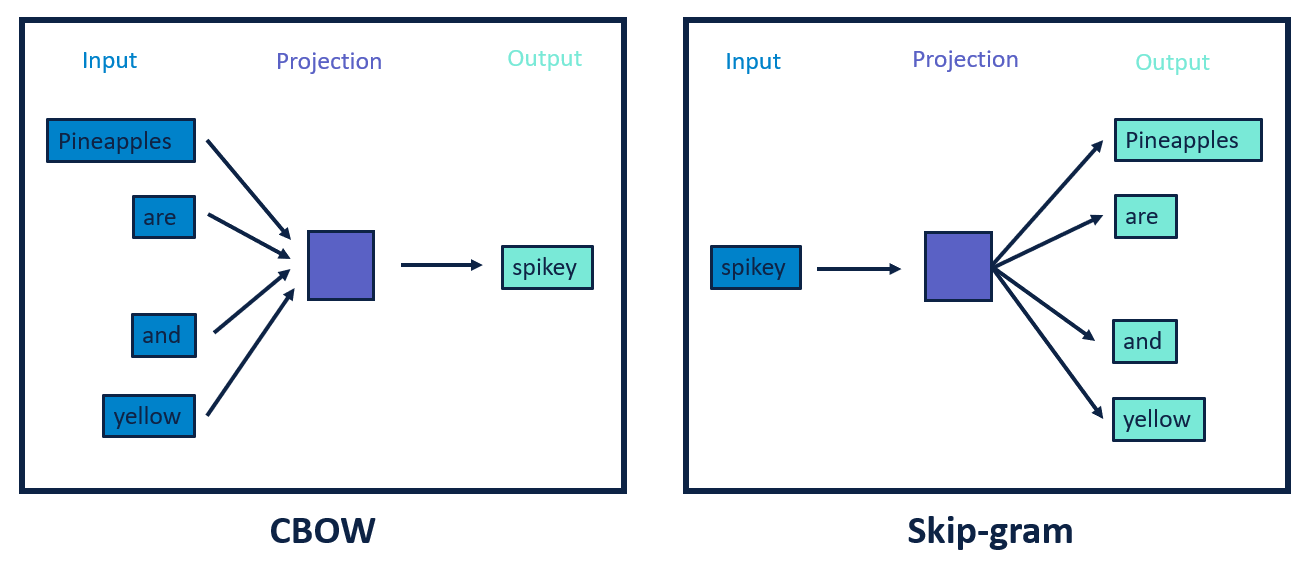

### Incrustación Skip-gram

En las incrustaciones **Skip-gram**, queremos predecir las palabras circundantes a partir de una palabra dada.
En lugar de predecir todas las palabras circundantes a la vez, creamos pares de contexto y objetivo.
Definimos un tamaño de ventana y creamos un par contexto-objetivo donde la palabra central es el contexto, y cada palabra dentro de la ventana de palabras circundantes será nuestro objetivo.

El objetivo del entrenamiento es predecir la palabra objetivo dado el contexto. Proporcionamos la función para crear los pares contexto-objetivo, por lo que no necesitas implementarla tú mismo.

Usaremos estos pares contexto-objetivo para entrenar una red neuronal que predecirá la palabra objetivo y, durante el entrenamiento, la capa oculta de la red neuronal se convertirá en la incrustación de nuestra palabra de contexto.
Para obtener la incrustación después del entrenamiento, simplemente ingresamos una palabra y extraemos los valores de la capa oculta de la red.


**Celda 16: Definición de Hyperparámetros para Skip-gram Embedding**

In [ ]:
# Parámetros para el Embedding Skip-gram
WINDOW_SIZE = 2
EMBEDDING_SIZE = 2

**Celda 17: Implementación de la Función Skip-grams**

In [ ]:
import random

# Código para generar pares de Skip-gram (no necesitas entenderlo completamente)
def skipgrams(sequences, window_size=2, shuffle=True):
    couples = []
    for sequence in sequences:
        for i, wi in enumerate(sequence):
            window_start = max(0, i - window_size)
            window_end = min(len(sequence), i + window_size + 1)
            for j in range(window_start, window_end):
                if j != i:
                    wj = sequence[j]
                    couples.append([wi, wj])
    if shuffle:
        seed = random.randint(0, 10**6)
        random.shuffle(couples)
    return torch.Tensor(couples)


**Celda 18: Ejemplo de Generación de Skip-grams**

Vamos a ver cómo se generan los pares de Skip-gram a partir de una oración de prueba.

In [ ]:
# Creamos el vocabulario
animal_vocab = SimpleVocabulary(animal_corpus)

# Oración de prueba
test_sequence = 'el gato se puso en la estera'
print('La oración:', test_sequence)

# Tokenizar la oración
tokenized_sequence = simple_tokenizer(test_sequence)
print('La oración dividida en tokens:', tokenized_sequence)

# Indexar la oración
indexed_sequence = [animal_vocab.get_index(token) for token in tokenized_sequence]
print('La oración indexada:', indexed_sequence)

# Generar los pares de Skip-gram sin mezclar
skipgrams_sequence = skipgrams([indexed_sequence], shuffle=False).int()
print('Todos los pares de Skip-gram generados:', skipgrams_sequence)

# Convertir los índices de vuelta a palabras para ver los pares
skipgrams_sequence_words = [(animal_vocab.get_token(x[0]), animal_vocab.get_token(x[1])) for x in skipgrams_sequence]
print('Los pares de Skip-gram en texto:', skipgrams_sequence_words)

# Ahora generamos todos los pares de Skip-gram para el conjunto de datos completo "Cat on the Mat".

# Creamos el vocabulario
animal_vocab = SimpleVocabulary(animal_corpus)

# Indexar todo el texto del corpus
indexed_text = [[animal_vocab.get_index(token) for token in simple_tokenizer(text)] for text in animal_corpus]

# Generar todos los pares de Skip-gram con el tamaño de ventana definido
pairs = skipgrams(indexed_text, WINDOW_SIZE)
print(f'Hay {len(pairs)} pares de Skip-gram creados a partir del dataset "el gato en la estera".')


**Ejercicio 2.1:** Crea la clase SkipgramEmbedder, una red neuronal que reduce la representación de una palabra a un espacio más pequeño y luego predice la palabra objetivo.

**Celda 19: Implementación de SkipgramEmbedder**

In [ ]:
# Una capa de incrustación utilizada para convertir un int en one-hot
to_onehot = nn.Embedding.from_pretrained(torch.eye(len(animal_vocab)))

class SkipgramEmbedder(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(len(animal_vocab), EMBEDDING_SIZE)
        self.output_layer = nn.Linear(EMBEDDING_SIZE, len(animal_vocab))
        self.softmax = nn.Softmax()

    def embed(self, context_index):
        # IMPLEMENTA EL PASO DE INCRUSTACIÓN DEL MODELO SKIP-GRAM
        context_onehot = ... # Crea una representación one-hot del índice
        embedding = ... # Pasa la representación one-hot a través de la primera capa para crear una incrustación
        return embedding

    def forward(self, context_index):
        # IMPLEMENTA LA PROPAGACIÓN HACIA ADELANTE PARA PREDECIR LA PALABRA OBJETIVO DESDE LA PALABRA DE CONTEXTO
        embedding = ... # Usa la función self.embed
        output = ... # Pasa la incrustación a través de la segunda capa para crear una salida
        prediction = ... # Pasa la salida a través de softmax
        return prediction


#### Aprendiendo las incrustaciones
Ejecuta el código a continuación para entrenar tu modelo de incrustación y que aprenda las representaciones de las palabras.

**Ejercicio 2.2:** Implementa una red que entrene tu modelo de incrustación prediciendo las palabras objetivo basadas en el contexto.

**Pista**: El código para entrenar es muy similar al ejercicio 1.3, pero ahora necesitamos usar *pares* para extraer los contextos actuales para la predicción y las palabras objetivo para la evaluación, además de alguna forma de rastrear los índices.

**Celda 20: Entrenamiento del Modelo SkipgramEmbedder**

In [ ]:
model = SkipgramEmbedder()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

#Épocas
TOTAL_EPOCHS = 1000
BATCH_SIZE = len(pairs)
EMBEDDING_SIZE = 100
# Para cada época
for epoch in range(TOTAL_EPOCHS):
    #
    # Una variable para contener la suma de todas las pérdidas de lote para esta época
    epoch_loss = 0
    #
    # Índice inferior
    start = 0
    #
    # Para cada lote
    for batch_nr, end in enumerate(range(BATCH_SIZE,len(pairs),BATCH_SIZE)):
        #
        targets =
        contexts =
        #
        start =
        #
        # Predecir para la palabra de contexto en el lote lo que la palabra de destino debe ser

        #
        # Calcula la pérdida de la predicción comparándola con la palabra objetivo real

        #
        # Backpropogate la pérdida a través de la red para encontrar los gradientes de todos los parámetros

        #
        # Actualizar los parámetros a lo largo de sus gradientes

        #
        # Borrar los valores de gradiente almacenados

        #
        # Añadir la pérdida a la pérdida total de época (item() convierte un escalar PyTorch en un tipo de dato Python normal)

        #
        # Imprimir la época, el lote y la pérdida
        print(
            f'\rEpoch {epoch+1} [{batch_nr+1}/{len(targets)/BATCH_SIZE}] - Loss: {loss}',
            end=''
        )

#### Visualización de las incrustaciones(embeddings)
No es necesario entender el código que se muestra a continuación, en su lugar se lo explicaremos aquí.
A continuación, pasamos cada palabra del conjunto de datos «gato en la alfombra» por el SkimgramEmbedder para obtener su incrustación. Después, utilizamos [Prinipal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) para reducir la dimensionalidad de la incrustación a 2 (si ha cambiado la dimensionalidad a algo más grande) y luego lo imprimimos como un gráfico en el que cada grupo de palabras tiene el mismo color para mostrar cómo se agrupan. Lo ideal es que el entrenamiento haya convergido hacia agrupaciones claras de palabras similares. Si no es así, intente repetir el entrenamiento (no deberían ser necesarios muchos intentos para obtener una incrustación que separe claramente la mayoría de los grupos de palabras). Si no consigue una incrustación que separe todos los grupos, no se preocupe mientras la mayoría de los grupos estén separados.

**Celda 21: Visualización de las Incrustaciones (Embeddings) usando PCA**

In [ ]:
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

category_colors = {'animales' : 'green',
                   'acciones' : 'blue',
                   'muebles' : 'yellow'}

colors = ['red'] * vocabulary_size

for word in animal_vocab.index2token:
    index = animal_vocab.get_index(word)
    if word in animals:
        colors[index] = category_colors['animales']
    elif word in actions:
        colors[index] = category_colors['acciones']
    elif word in furniture:
        colors[index] = category_colors['muebles']

def plot_embeddings_after_pca(vectors):
    """
    Realiza PCA y grafica los dos componentes principales
    Args:
      vectors (np.array): Conjunto de vectores
    """
    pca = PCA(n_components=2)
    vectors_pca = pca.fit_transform(vectors)
    plt.figure(figsize=(20,10))
    plt.scatter(vectors_pca[:,0], vectors_pca[:,1], c=colors, s=100, alpha=0.3)
    plt.title('Embeddings después de PCA')
    legend_elements = [
                plt.Line2D([0], [0], marker='o', color=category_colors['animales'], label='Animales'),
                plt.Line2D([0], [0], marker='o', color=category_colors['acciones'], label='Acciones'),
                plt.Line2D([0], [0], marker='o', color=category_colors['muebles'], label='Muebles'),
                plt.Line2D([0], [0], marker='o', color='red', label='Otros'),
              ]

    # Crear la leyenda
    plt.legend(handles=legend_elements)
    plt.show()

# Extraer los embeddings
numpy_word_vectors = model.embed(torch.arange(vocabulary_size)).detach().numpy()

print('Los embeddings de todas las palabras en el vocabulario:')
print(numpy_word_vectors)

# Graficar los embeddings
plot_embeddings_after_pca(numpy_word_vectors)


## 3.Usando Incrustaciones (Embeddings) Preentrenados
Uno de los problemas de entrenar la incrustación de palabras es que se necesita un conjunto de datos que contenga todas las palabras que se quieren incrustar en muchas frases diferentes.
Para ello se necesitan conjuntos de datos realmente grandes (la Wikipedia al completo, por ejemplo).
Esto es inviable para la mayoría de la gente, ya que requiere grandes cantidades de potencia de cálculo y la capacidad de descargar y almacenar enormes conjuntos de datos.
Por no mencionar que, si todo el mundo lo hiciera, se desperdiciaría mucha energía en comparación con la reutilización de redes preentrenadas.
En consecuencia, se han puesto a disposición del público incrustaciones preentrenadas creadas por investigadores con acceso a grandes recursos informáticos.
Se trata de una forma eficaz de acceder a buenas incrustaciones de palabras ahorrando tiempo y energía.

Utilizaremos una de estas redes de incrustación preentrenadas para entrenar una red que realice predicciones sobre el conjunto de datos AG News.

El AG News es un conjunto de datos conocido en el procesamiento del lenguaje natural que contiene noticias categorizadas


**Celda 22: Carga de Embeddings Preentrenados**

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api

# Cargar embeddings preentrenados
wv = api.load('word2vec-google-news-300')

print(wv['horse'])

Las incrustaciones de palabras contienen representaciones matemáticas del significado subyacente de las palabras. Como cada incrustación tiene las mismas dimensiones, puede utilizar el álgebra lineal para ver cómo piensa el modelo.
Pruebe a jugar con algunas palabras y métodos para investigar cómo ve el modelo el lenguaje.

**Celda 23: Ejemplos de Similitud y Operaciones con Vectores en Embeddings Preentrenados**

Hay un ejemplo famoso de matemáticas de incrustación que dice «rey» - «hombre» + «mujer» = «reina». Este ejemplo, y las matemáticas de incrustación en general, utilizan el hecho de que las incrustaciones no son más que vectores en un espacio vectorial de alta dimensionalidad, y ciertas características del lenguaje tienden a existir a lo largo de ciertos ejes y se agrupan con palabras similares. Así, cabría esperar que rey estuviera presente en el eje «realeza» y en el eje «hombre». Si se elimina hombre y se añade mujer, se obtiene «realeza» + «mujer», es decir, reina. A ver si encuentras otros ejemplos en los que funcionen las matemáticas semánticas, o un ejemplo en el que claramente no funcionen. ¿Tienen sentido los resultados?

In [ ]:
# Ejemplo de similitud entre palabras
dist = wv.similarity("king","dog")
print(f'Similitud entre "king" y "dog": {dist:.4f}')

# Ejemplo de operaciones con vectores
similars = wv.similar_by_vector(wv['king'] - wv['man'] + wv['woman'] - wv['boy'] + wv['girl'])
print(similars)

**Celda 24: Investigación del Vocabulario del Modelo Preentrenado**


In [ ]:
# Mostrar algunas palabras del vocabulario
nr_of_words = 10
for i in range(nr_of_words):
    word = wv.index_to_key[i]
    index = wv.key_to_index[word]
    print(word)

### Entrenamiento de una FFNN con w2v


Queremos entrenar una red usando nuestros embeddings preentrenados. Para ello, utilizamos la tarea y el código de AGnews-prediction with BoW, pero lo modificamos para adaptarlo a nuestras incrustaciones w2v.
Primero creamos el conjunto de datos.

**Celda 25: Implementación de w2vDatasetr**

In [ ]:
# Creamos nuestro propio conjunto de datos para cargar los textos incrustados w2v
class w2vDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, embedder):
        self.dataset = dataset
        self.embedder = embedder

    def __getitem__(self, index):
        return self.dataset[index][0], self.embedder(self.dataset[index][1], 300)

    def __len__(self):
        return len(self.dataset)

Luego creamos un incrustador que codifica cada palabra usando nuestro codificador w2v (wv.get_vector(token)).
En comparación con cuando usamos un codificador BoW, ahora nos enfrentamos a dos problemas: palabras fuera del vocabulario (OOV) y longitud variable de las oraciones.

**Ejercicio 3.1:** Crea un incrustador w2v usando nuestro modelo w2v preentrenado. <br>
**Ejercicio 3.1.1:** Describe tres posibles formas de lidiar con palabras OOV y longitud variable de oraciones. ¿Cuáles son los beneficios y desventajas de los métodos que has descrito? <br>
**Ejercicio 3.1.2:** Implementa uno de estos métodos para OOV y longitud de entrada variable para hacer posible el entrenamiento de una FFNN (tus métodos no tienen que ser buenos, solo compilables). <br>
**Pista:** <br>
for x in range(len(tokens)): <br>
    try: # calcula la incrustación word2vec de la palabra. Agrégala a la forma en que almacenas las incrustaciones <br>
    except: # maneja (o ignora) oov

**Celda 26: Creación de w2v_embedder**

In [ ]:
def w2v_embedder(tensor, embedding_length):
    '''
    Toma un tensor y una longitud de incrustación y devuelve la incrustación w2v de ese tensor
    Args:
        tensor (torch.Tensor): Un tensor de palabras representadas por su índice en el vocabulario
        embedding_length (int): La longitud de la incrustación
    Returns (torch.Tensor): Un tensor que contiene la incrustación w2v del tensor de entrada
    '''
    ## AÑADE CÓDIGO AQUÍ
    ...

    tensor = tensor.long()
    # Inicia tu incrustación
    embedding =
    # ¿Cómo obtenemos palabras de nuestro tensor?
    words =
    # ¿Cómo obtenemos tokens de nuestras palabras?
    tokens =
    # ¿Sobre qué iteramos?
    for x in ...:
        # ¿Cómo manejamos las palabras fuera del vocabulario (OOV)?
        # ¿Cómo incrustamos nuestro token?
        # ¿Cómo lo almacenamos?
    return embedding

Luego diseñamos y entrenamos una red

**Ejercicio 3.2:** Construye un modelo que tome las codificaciones w2v del conjunto de datos AG-NEWS como entradas y produzca las clases de AG-NEWS como salidas. Es posible que la red no converja hacia un buen rendimiento dependiendo de tus soluciones para el 3.1. ¿Por qué?

**Pista:** Recuerda el clasificador BoW que implementamos y reutiliza esa estructura.  
Es posible que el rendimiento sea realmente malo (25% de precisión). Esto está bien y se corregirá más adelante.

**Celda 27: Creación de la Red Neuronal para FFNN con w2v Embeddings**

In [ ]:
w2v_train_data = w2vDataset(ag_train, w2v_embedder)
w2v_test_data = w2vDataset(ag_test, w2v_embedder)
w2v_trainloader = DataLoader(w2v_train_data, batch_size=1000, shuffle=True)
w2v_testloader = DataLoader(w2v_test_data, batch_size=1000, shuffle=False)

embedding_length = 300


**Celda 28: Creación de la Red Neuronal para FFNN con w2v Embeddings**

In [ ]:
## CREA UNA RED NEURONAL PARA ENTRENAR
#network = nn.Sequential(
#    ... # PISTA: Queremos que nuestra entrada sea del tamaño de nuestras incrustaciones w2v y nuestra salida sean las diferentes clases posibles
#)


**Celda 29: Definición del Optimizador, Función de Pérdida y Ciclo de Entrenamiento para FFNN con w2v**

In [ ]:
## Inicializar el optimizador, la función de pérdida y el número de épocas
#
#


for epoch in range(epochs):
    # Para cada lote de datos (ya que el conjunto de datos es demasiado grande para pasar todos los datos por la red a la vez)
    for ...:
       ## ESCRIBE EL CÓDIGO DE ENTRENAMIENTO AQUÍ
       #...
        # Predice para cada texto representado por BoW en el lote a qué clase pertenecen

        # Calcula la pérdida de la predicción comparando con la salida esperada

        # Retropropaga la pérdida a través de la red para encontrar los gradientes de todos los parámetros

        # Actualiza los parámetros a lo largo de sus gradientes

        # Borra los valores de gradiente almacenados

        # Imprime la época, el lote y la pérdida
        print(
            f'\rÉpoca {epoch+1} [{batch_nr+1}/{len(w2v_trainloader)}] - Pérdida: {loss}',
            end=''
        )

**Ejercicio 3.3:** Calculemos de nuevo la precisión y la matriz de confusión.

**Celda 30: Evaluación del Rendimiento del Modelo FFNN con w2v**

In [ ]:
with torch.no_grad():
    classes = [0, 1, 2, 3]
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    # Para cada lote de datos de prueba (ya que el conjunto de datos es demasiado grande para pasar todos los datos por la red a la vez)
    # Calcula la precisión, la exactitud y la exhaustividad
    for batch_nr, (labels, data) in enumerate(w2v_testloader):
        ## ESCRIBE EL CÓDIGO DE PRUEBA AQUÍ
        ...

    print(f'La precisión de la red es {str(100*correct/total)[:4]}%.')

**Celda 31: Plot de la Matriz de Confusión para FFNN con w2v**

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0, 1, 2, 3])
numpy.set_printoptions(precision=2)

# Graficar matriz de confusión sin normalizar
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Mundo', 'Deportes', 'Negocios', 'Ciencia/Tecnología'],
                      title='Matriz de confusión, sin normalización')

Investiguemos también cómo las incrustaciones preentrenadas separan los animales, las acciones y los muebles de nuestro corpus inicial. También puede insertar aquí cualquier palabra del corpus word2vec (wv.vocab) y ver cómo se proyectan en un espacio 2D utilizando PCA.

**Celda 32: Visualización de las Incrustaciones Preentrenadas usando PCA**

In [ ]:
#%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

numpy_word_vectors = numpy.zeros([18,300])

category_colors = {'animals' : 'green',
                   'actions' : 'blue',
                   'furniture' : 'yellow'}

colors = []
for i in range(vocabulary_size):
    colors.append('red')

for word in animal_vocab.index2token:
    index = animal_vocab.get_index(word)
    numpy_word_vectors[index,:] = wv[word]
    if word in animals:
        colors[index] = category_colors['animals']
    elif word in actions:
        colors[index] = category_colors['actions']
    elif word in furniture:
        colors[index] = category_colors['furniture']

# Grafica las incrustaciones usando PCA (no necesitas entenderlo)
def plot_embeddings_after_pca(vectors):
        """
        Realiza PCA y grafica los 2 componentes resultantes en los ejes X e Y
        Args:
          embedding_weights - el conjunto de vectores a
        """
        pca = PCA(n_components=2)
        vectors_pca = pca.fit_transform(vectors)
        plt.figure(figsize=(20,10))

        # No dibujamos el primer elemento, que es el token 'Fuera-de-Vocabulario'
        plt.scatter(vectors_pca[:,0], vectors_pca[:,1], c=colors, s=100, alpha=0.3);
        plt.title('Incrustaciones después de PCA')
        legend_elements = [
                    plt.Line2D([0], [0], marker='o', color=category_colors['animals'], label='Animales'),
                    plt.Line2D([0], [0], marker='o', color=category_colors['actions'], label='Acciones'),
                    plt.Line2D([0], [0], marker='o', color=category_colors['furniture'], label='Muebles'),
                    plt.Line2D([0], [0], marker='o', color='red', label='Otros'),
                  ]

        # Crea la figura
        plt.legend(handles=legend_elements);

# Extrayendo las incrustaciones para cada palabra en el vocabulario, separándolas de PyTorch y convirtiéndolas en numpy


print('Las incrustaciones de todas las palabras en el vocabulario')
print(numpy_word_vectors)

# Muestra los ejes más significativos de los vectores de palabras usando PCA
plot_embeddings_after_pca(numpy_word_vectors)

Vemos que, a pesar de abarcar 300 millones de palabras, los animales, las acciones y los muebles están separados por el modelo, siendo los animales los más repartidos de los tres.

## 4. Redes Neuronales Recurrentes

Como tarea final, usemos incrustaciones donde realmente importan, en redes neuronales recurrentes (RNNs) (o Transformers, pero ese es un tema para otro curso). Las RNNs se cubren en la primera lección de ANN3, pero considera esto como un adelanto donde aún no necesitas entender el funcionamiento interno de la caja negra.

<a title="fdeloche, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Recurrent_neural_network_unfold.svg"><img width="512" alt="Recurrent neural network unfold" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/512px-Recurrent_neural_network_unfold.svg.png"></a>

Las RNNs tienen un beneficio importante en que pueden usar secuencias de entrada de cualquier longitud en la misma red. Cuando usamos BoW, nuestras codificaciones se colapsaron a las mismas dimensiones, pero con w2v nos enfrentamos al desafío de tener dimensiones de entrada variables. En las RNNs, nuestra entrada se alimenta secuencialmente a la red junto con la salida anterior de la red. Después de que nuestro primer token de entrada se transforma en una predicción, esta predicción se alimenta a la misma red junto con el siguiente token, hasta que se han visto todos los tokens. Así, independientemente de si nuestra secuencia de entrada es una palabra o 100 palabras, el tamaño de la red sigue siendo el mismo (pero para 100 palabras tendremos que hacer retropropagación 100 veces a través de la red para entrenarla. ¿Qué problemas podría causar esto?).

Ahora implementaremos otro incrustador w2v, esta vez manteniendo la estructura secuencial de nuestros datos. Pero primero, hagamos una tercera clase de conjunto de datos.

**Celda 33: Implementación de rnnDataset**

In [ ]:
# Creamos nuestro propio conjunto de datos para cargar los textos incrustados con w2v
class rnnDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, embedder):
        self.dataset = dataset
        self.embedder = embedder

    def __getitem__(self, index):
        return self.dataset[index][0], self.embedder(self.dataset[index][1], 300)

    def __len__(self):
        return len(self.dataset)

**Ejercicio 4.1:** Implementa un incrustador para rnnDataset que tome un tensor de entrada, lo transforme de palabras->tokens->incrustaciones, y luego almacene las incrustaciones manteniendo la integridad estructural de las oraciones originales. <br>
**Pista:** El incrustador debería ser bastante similar al incrustador w2v. Considera usar numpy.shape() para investigar la forma de tu conjunto de datos y recuerda que puedes pasar de lista a numpy.array con numpy.asarray(). <br>
No necesariamente necesitas la longitud de incrustación ya que creamos secuencias de incrustaciones

****Celda 34: Implementación de rnn_embedder**

In [ ]:
def rnn_embedder(tensor, embedding_length):
    '''
    Toma un tensor y una longitud de incrustación y devuelve una secuencia de las incrustaciones w2v de cada token en ese tensor
    Args:
        tensor (torch.Tensor): Un tensor de palabras representadas por su índice en el vocabulario
        embedding_length (int): La longitud de la incrustación
    Returns (torch.Tensor): Un tensor que contiene las incrustaciones w2v del tensor de entrada
    '''

    ## AÑADE CÓDIGO AQUÍ
    ...

    tensor = tensor.long()
    # Inicia tu incrustación
    embedding =
    # ¿Cómo obtenemos palabras de nuestro tensor?
    words =
    # ¿Cómo obtenemos tokens de nuestras palabras?
    tokens =
    # ¿Sobre qué iteramos?
    for x in ...:
        # ¿Cómo manejamos las palabras fuera del vocabulario (OOV)?
        # ¿Cómo incrustamos nuestro token?
        # ¿Cómo lo almacenamos secuencialmente?
    return embedding

Ahora diseñaremos una red LSTM. Al implementar modelos de aprendizaje automático, a menudo hay que consultar la documentación original. Por lo tanto, vayamos a https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html para estudiar los tamaños de entrada, ocultos y de salida de la clase torch.nn.LSTM.

**Ejercicio 4.2:** Completa la implementación de nuestra clase de red LSTM. <br>
**Pista:** No olvides el comando batch_first=True cuando mires primero el tamaño del lote o la longitud de la secuencia. <br>
Define el init y el forward

**Celda 36: Implementación de la Clase LSTM1**

In [ ]:
from torch.autograd import Variable

class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #número de clases
        self.num_layers = num_layers #número de capas
        self.input_size = input_size #tamaño de entrada
        self.hidden_size = hidden_size #estado oculto
        self.seq_length = seq_length #longitud de secuencia

        ## TAREA: Inserta las dimensiones correctas para nuestras capas LSTM y FC
        self.lstm = nn.LSTM(...) # Capa LSTM
        self.fc_1 =  nn.Linear(...) # Primera capa FC
        self.fc = nn.Linear(...) # Capa FC final

        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(...)) #estado oculto
        c_0 = Variable(torch.zeros()) #estado interno

        # Propagar entrada a través de LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm con entrada, estado oculto y estado interno
        hn = hn.view(-1, self.hidden_size) #remodelando los datos para la siguiente capa Densa
        out = self.relu(hn)
        out = self.fc_1(out) #primera Densa
        out = self.relu(out) #relu
        out = self.fc(out) #Salida Final
        return out

**Celda 37: Inicialización de la Red LSTM y Ciclo de Entrenamiento**

In [ ]:
num_epochs = 2 #2 épocas
learning_rate = 0.001 #0.001 tasa de aprendizaje


input_size = ... #número de características
hidden_size = ... #número de características en el estado oculto
num_layers = ... #número de capas lstm apiladas
sequence_length = ...
num_classes = ...
device=torch.device('cpu')

lstm1 = LSTM1(num_classes=num_classes, input_size=input_size, hidden_size=hidden_size,
              num_layers=num_layers, seq_length=sequence_length) #nuestra clase lstm

optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

Usando nuestra clase LSTM y el cargador de datos RNN, entrenemos nuestra red y veamos qué tan bien funciona.

**Ejercicio 4.3:** Entrena la red para alcanzar una precisión de más del 90%. <br>
**Pista:** Considera empezar con un tamaño de lote = 1 o de lo contrario los datos tendrán múltiples longitudes de secuencia. <br>
Usa torch.from_numpy para convertir un array de numpy a torch

**Celda 38: Creación de DataLoaders para RNN**

In [ ]:
rnn_train_data = rnnDataset(ag_train, rnn_embedder)
rnn_test_data = rnnDataset(ag_test, rnn_embedder)
rnn_trainloader = DataLoader(rnn_train_data, batch_size=1, shuffle=True)
rnn_testloader = DataLoader(rnn_test_data, batch_size=1, shuffle=False)

Calculemos una vez más la precisión y la matriz de confusión.

**Ejercicio 4.4:** Calcula la precisión y la matriz de confusión. ¿Qué tan bien funciona tu red? ¿Qué podrías hacer para mejorar aún más la precisión (no tienes que implementarlo)?

**Celda 39: Evaluación del Modelo LSTM1**

In [ ]:
with torch.no_grad():
    classes = [0, 1, 2, 3]
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    # Para cada lote de datos de prueba (ya que el conjunto de datos es demasiado grande para pasar todos los datos por la red a la vez)
    # Calcula la precisión, la exactitud y la exhaustividad
    for batch_nr, (labels, data) in enumerate(rnn_testloader):
        ## ESCRIBE EL CÓDIGO DE PRUEBA AQUÍ
        ...


    print(f'La precisión de la red es {str(100*correct/total)[:4]}%.')

**Celda 40: Plot de la Matriz de Confusión para LSTM1**

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0, 1, 2, 3])
numpy.set_printoptions(precision=2)

# Graficar matriz de confusión sin normalizar
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Mundo', 'Deportes', 'Negocios', 'Ciencia/Tec'],
                      title='Matriz de confusión, sin normalización')

Has llegado al final del ejercicio 1. Buen trabajo.

## **Ejercicio 2: Crea y utiliza una arquitectura GPT (Resuelto no hace falta modificar nada)**

En este ejercicio, exploraremos cómo las arquitecturas basadas en Transformers, específicamente GPT-2, han revolucionado el campo del Procesamiento de Lenguaje Natural (NLP). A diferencia de las redes neuronales recurrentes (RNNs) que vimos en el Ejercicio 1, los Transformers utilizan mecanismos de atención que permiten procesar secuencias completas de manera paralela, mejorando significativamente el rendimiento en tareas de generación y comprensión de texto.

## Objetivos del Ejercicio:
- Comprender los conceptos básicos de los Transformers y GPT-2.
- Implementar una versión simplificada de GPT-2 utilizando PyTorch.
- Entrenar el modelo en un conjunto de datos pequeño para generar texto.
- Comparar los resultados obtenidos con los modelos anteriores.

## Sección 2.1: Fundamentos de Transformers y GPT-2 (Resuelto, no hace falta cambiar nada)

Antes de sumergirnos en la implementación, es esencial entender los componentes clave de los Transformers y cómo GPT-2 los utiliza para generar texto de alta calidad.

- **Transformers**: Introducidos por Vaswani et al. en 2017, los Transformers se basan en mecanismos de atención que permiten al modelo enfocarse en diferentes partes de la secuencia de entrada al mismo tiempo, eliminando la necesidad de procesar datos de forma secuencial como en las RNNs.

- **GPT-2 (Generative Pre-trained Transformer 2)**: Es una arquitectura de modelo de lenguaje basada en Transformers que ha sido preentrenada en grandes cantidades de texto. GPT-2 puede generar texto coherente y contextualmente relevante a partir de una entrada dada.

**Celda 0: Preparación de los Datos**

### Preparación de los Datos

Para entrenar nuestro modelo, utilizaremos el mismo conjunto de datos "Cat on the mat" que vimos en el Ejercicio 1.


In [ ]:
animals = ['cat', 'dog', 'goat', 'elephant', 'eagle', 'zebra', 'rhino', 'hippo']
actions = ['sat', 'stood', 'jumped', 'slept']
furniture = ['mat', 'rug', 'sofa', 'bed']

# Generar el corpus
animal_corpus = [f'the {x[0]} {x[1]} in the {x[2]}' for x in itertools.product(animals, actions, furniture)]

# Funciones básicas
def simple_tokenizer(text):
    return text.split(' ')

for oracion in animal_corpus[:10]:
  print(oracion)

the cat sat in the mat
the cat sat in the rug
the cat sat in the sofa
the cat sat in the bed
the cat stood in the mat
the cat stood in the rug
the cat stood in the sofa
the cat stood in the bed
the cat jumped in the mat
the cat jumped in the rug


Explicación:

- **animal_corpus**: Genera todas las combinaciones posibles de animales, acciones y muebles en oraciones.

- **SimpleVocabulary** y **encode**: Reutiliza las clases y funciones definidas en el Ejercicio 1 para crear el vocabulario y codificar las oraciones.

- **División de datos**: Separa el 90% de los datos para entrenamiento y el 10% restante para validación.

**Celda 1: Definición de Tokens Especiales y Extensión del Vocabulario**

In [ ]:
# CELDA 2: Definición del Vocabulario
# Definición de Tokens Especiales
PAD_TOKEN = '<pad>'
UNK_TOKEN = '<unk>'

class SimpleVocabulary():
    def __init__(self, corpus):
        if isinstance(corpus, list):
            corpus = ' '.join(corpus)

        # Obtener todas las palabras únicas del corpus
        all_words = set(word.lower() for word in simple_tokenizer(corpus))

        self.token2index = {}
        self.index2token = []

        # Agregar tokens especiales primero
        special_tokens = ['<pad>', '<unk>']
        for token in special_tokens:
            self.token2index[token] = len(self.token2index)
            self.index2token.append(token)

        # Agregar el resto del vocabulario
        for word in sorted(all_words):  # Ordenar para consistencia
            if word not in self.token2index:
                self.token2index[word] = len(self.token2index)
                self.index2token.append(word)

    def get_index(self, token):
        token = str(token).lower()
        return self.token2index.get(token, self.token2index['<unk>'])

    def get_token(self, index):
        if 0 <= index < len(self.index2token):
            return self.index2token[index]
        return '<unk>'

    def __len__(self):
        return len(self.index2token)

def index_sequence(sequence, vocabulary):
    return [vocabulary.get_index(token) for token in sequence]

In [ ]:
animal_vocab = SimpleVocabulary(animal_corpus)

**Celda 2: Definición de Hiperparámetros**

In [ ]:
batch_size = 32
block_size = 8
max_iters = 400
eval_interval = 100
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 100
n_embd = 128
n_head = 4
n_layer = 4
dropout = 0.1
vocab_size = len(animal_vocab)

**Celda 3: Definición de los Componentes del Transformer**

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math

# Definición de la Cabeza de Atención
class Head(nn.Module):
    """Una sola cabeza de auto-atención"""
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x)   # (B, T, hs)
        q = self.query(x) # (B, T, hs)
        wei = q @ k.transpose(-2, -1) * C**-0.5  # (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        v = self.value(x)  # (B, T, hs)
        out = wei @ v      # (B, T, hs)
        return out

# Definición de la Múltiple Cabeza de Atención
class MultiHeadAttention(nn.Module):
    """Múltiples cabezas de auto-atención en paralelo"""
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

# Definición de la Red FeedForward
class FeedForward(nn.Module):
    """Una simple capa lineal seguida de una no linealidad"""
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

# Definición del Bloque Transformer
class Block(nn.Module):
    """Bloque Transformer: comunicación seguida de computación"""
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x


### Explicación de los componentes del Transformer:

- **Head**: Implementa una sola cabeza de atención, calculando las claves, consultas y valores, y aplicando la máscara triangular inferior para evitar mirar hacia el futuro.

- **MultiHeadAttention**: Combina múltiples cabezas de atención en paralelo y proyecta los resultados concatenados de vuelta al espacio de embeddings.

- **FeedForward**: Una red neuronal simple con una capa oculta y activación ReLU, seguida de una capa de salida y dropout.

- **Block**: Un bloque Transformer que combina la atención multi-cabeza y la red feedforward, cada una con normalización de capa y conexiones residuales.

**Celda 4: Definición del Modelo GPTSimplificado**

In [ ]:
class GPTSimplificado(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx)  # (B, T, C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))  # (T, C)
        x = tok_emb + pos_emb  # (B, T, C)
        x = self.blocks(x)  # (B, T, C)
        x = self.ln_f(x)  # (B, T, C)
        logits = self.lm_head(x)  # (B, T, vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]  # Mantener solo los últimos block_size tokens
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]  # (B, C)
            probs = F.softmax(logits, dim=-1)  # (B, C)
            idx_next = torch.multinomial(probs, num_samples=1)  # (B, 1)
            idx = torch.cat((idx, idx_next), dim=1)  # (B, T+1)
        return idx


### Explicación del modelo GPTSimplificado:

- **token_embedding_table** y **position_embedding_table**: Convierte los índices de tokens y posiciones en vectores de embeddings.

- **blocks**: Secuencia de bloques Transformer definidos previamente.

- **ln_f** y **lm_head**: Normalización final y capa lineal para predecir los logits de los tokens siguientes.

- **forward**: Pasa los índices de entrada a través de las capas del modelo y calcula la pérdida si se proporcionan objetivos.

- **generate**: Genera nuevos tokens secuencialmente basándose en los tokens generados previamente.

**Celda 5: Función para realizar Padding en las Secuencias**

In [ ]:
encoded_corpus = [index_sequence(text.split(), animal_vocab) for text in animal_corpus]

def pad_sequences(sequences, max_length, padding_value=animal_vocab.get_index('<pad>')):
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_length:
            padded_seq = seq + [padding_value] * (max_length - len(seq))
        else:
            padded_seq = seq[:max_length]
        padded_sequences.append(padded_seq)
    return padded_sequences

# Determinar la Longitud Máxima de las Secuencias
max_length = max(block_size, max(len(seq) for seq in encoded_corpus))
print(f'Longitud máxima de las secuencias: {max_length}')

# Realizar Padding en las Secuencias
padded_encoded_corpus = pad_sequences(encoded_corpus, max_length)

# Convertir a Tensor
data = torch.tensor(padded_encoded_corpus, dtype=torch.long)

# División en Entrenamiento y Validación
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

Longitud máxima de las secuencias: 8


**Celda 6: Función para Obtener Lotes de Datos**

In [ ]:
import torch.nn.functional as F

def get_batch(split):
    """
    Genera un lote de datos para entrenamiento o validación.

    Args:
        split (str): 'train' o 'val' para indicar el conjunto de datos.

    Returns:
        Tuple[torch.Tensor, torch.Tensor]: Tensores de entrada (x) y objetivos (y) de forma (batch_size, block_size).
    """
    data_split = train_data if split == 'train' else val_data
    batch_x = []
    batch_y = []

    for _ in range(batch_size):
        # Seleccionar una oración aleatoria
        sentence_idx = torch.randint(len(data_split), (1,)).item()
        sentence = data_split[sentence_idx]

        # Obtener la secuencia de entrada y la secuencia objetivo
        x = sentence[:block_size]
        y = sentence[1:block_size + 1]  # Esto dará 7 tokens

        # Verificar la longitud de y y rellenar si es necesario
        if len(y) < block_size:
            pad_length = block_size - len(y)
            pad_tensor = torch.tensor([animal_vocab.get_index(PAD_TOKEN)] * pad_length, dtype=torch.long)
            y = torch.cat([y, pad_tensor])

        batch_x.append(x)
        batch_y.append(y)

    # Convertir listas a tensores y mover al dispositivo
    x = torch.stack(batch_x)  # Forma: (batch_size, block_size)
    y = torch.stack(batch_y)  # Forma: (batch_size, block_size)
    x, y = x.to(device), y.to(device)

    # Verificación de las formas
    assert x.shape == (batch_size, block_size), f"x shape: {x.shape}, expected: ({batch_size}, {block_size})"
    assert y.shape == (batch_size, block_size), f"y shape: {y.shape}, expected: ({batch_size}, {block_size})"

    return x, y


Explicación:

- **get_batch**: Selecciona aleatoriamente secuencias de longitud block_size para entrenamiento o validación, desplazando los objetivos una posición hacia adelante.

**Celda 7: Función para Estimar la Pérdida**

In [ ]:
@torch.no_grad()
def estimate_loss():
    """
    Calcula la pérdida promedio en los conjuntos de entrenamiento y validación.

    Returns:
        dict: Diccionario con las pérdidas promedio para 'train' y 'val'.
    """
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


Explicación:

- **estimate_loss**: Evalúa la pérdida promedio en los conjuntos de entrenamiento y validación sin actualizar los pesos del modelo.

**Celda 8: Inicialización del Modelo y Parámetros**

Explicación:

- **Parámetros del modelo**: Define el tamaño de batch, longitud del bloque, número de iteraciones, tasa de aprendizaje, dimensiones de embeddings, número de cabezas de atención, número de capas Transformer y tasa de dropout.

- **Inicialización del modelo**: Crea una instancia de GPTSimplificado y la mueve al dispositivo seleccionado (GPU si está disponible).

- **Optimizador**: Utiliza AdamW para actualizar los parámetros del modelo durante el entrenamiento.

**Celda 9: Ciclo de Entrenamiento del Modelo**

In [ ]:
model = GPTSimplificado(vocab_size)
model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    # Evaluar periódicamente la pérdida en entrenamiento y validación
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"Iteración {iter}: Pérdida Entrenamiento {losses['train']:.4f}, Pérdida Validación {losses['val']:.4f}")

    # Obtener un lote de datos de entrenamiento
    xb, yb = get_batch('train')

    # Evaluar la pérdida
    logits, loss = model(xb, yb)

    # Retropropagación
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


Iteración 0: Pérdida Entrenamiento 3.1308, Pérdida Validación 3.1649
Iteración 100: Pérdida Entrenamiento 0.6243, Pérdida Validación 0.9894
Iteración 200: Pérdida Entrenamiento 0.6139, Pérdida Validación 1.0627
Iteración 300: Pérdida Entrenamiento 0.6085, Pérdida Validación 1.0810




Explicación:

- **Entrenamiento**: Para cada iteración, se evalúa periódicamente la pérdida en los conjuntos de entrenamiento y validación. Luego, se obtiene un lote de datos, se calcula la pérdida, se realiza la retropropagación y se actualizan los pesos del modelo.

**Celda 10: Definición de la Función generate_text**

In [ ]:
def generate_text(model, start_sentence, max_new_tokens):
    '''
    Genera texto a partir de una oración inicial usando el modelo GPTSimplificado.

    Args:
        model (GPTSimplificado): El modelo entrenado.
        start_sentence (str): La oración inicial para la generación.
        max_new_tokens (int): Número de tokens a generar.

    Returns:
        str: El texto generado.
    '''
    # Tokenizar el contexto inicial
    context_tokens = [animal_vocab.get_index(token) for token in start_sentence.split()]

    # Convertir a tensor y añadir una dimensión de batch
    context_tensor = torch.tensor([context_tokens], dtype=torch.long).to(device)

    # Generar nuevos tokens
    generated_indices = model.generate(context_tensor, max_new_tokens=max_new_tokens)

    # Convertir los índices generados de vuelta a tokens
    generated_tokens = [animal_vocab.get_token(idx) for idx in generated_indices[0].tolist()]

    # Unir los tokens en una sola cadena de texto
    generated_text = ' '.join(generated_tokens)

    return generated_text


**Celda 11: Generación de Texto con el Modelo Entrenado**

In [ ]:
# CELDA 11: Prueba de generación
start_sentence = 'el perro'
print(f'\nEntrada: "{start_sentence}"')
generated = generate_text(model, start_sentence, max_new_tokens=4)
print(f'Texto generado: "{generated}"')

# Verificar el vocabulario
print('\nContenido del vocabulario:')
for i, token in enumerate(animal_vocab.index2token):
    print(f'{i}: {token}')


Entrada: "el perro"
Texto generado: "<unk> <unk> slept in the rug"

Contenido del vocabulario:
0: <pad>
1: <unk>
2: bed
3: cat
4: dog
5: eagle
6: elephant
7: goat
8: hippo
9: in
10: jumped
11: mat
12: rhino
13: rug
14: sat
15: slept
16: sofa
17: stood
18: the
19: zebra


Explicación:

- **generate_text**: Toma una cadena de texto de inicio, la codifica, la pasa al modelo para generar nuevos tokens, y finalmente decodifica los índices generados de vuelta a texto legible.

- **Ejemplo de uso**: Inicia la generación de texto con la frase "el gato" y produce 20 nuevos tokens.

## Sección 2.3: Observaciones y Conclusiones

- **Coherencia del Texto**: El modelo Transformer, gracias a su mecanismo de atención, es capaz de generar secuencias de texto más coherentes y contextualmente relevantes en comparación con modelos más simples. No obstante, debido a nuestro limitado vocabulario y muy simple arquitectura no se notan diferencias sustanciales.
Si quieres ver una implementación mas real de GPT2 (pero también simplificada) te recomiendo ver este repositorio: https://github.com/minimaxir/gpt-2-simple
- **Paralelización**: A diferencia de las RNNs, los Transformers permiten el procesamiento paralelo de datos, lo que resulta en tiempos de entrenamiento más eficientes.

- **Escalabilidad**: Los Transformers son altamente escalables y se han demostrado efectivos en una variedad de tareas de NLP, desde generación de texto hasta traducción y comprensión.

¡Felicidades! Has completado el Ejercicio 2!

Si quieres conocer más en detalle como funcionan los LLM te recomiendo estos dos videos de Andrej Karphaty:

* https://www.youtube.com/watch?v=kCc8FmEb1nY&ab_channel=AndrejKarpathy
* https://www.youtube.com/watch?v=l8pRSuU81PU&ab_channel=AndrejKarpathy

o esta guía práctica de LLM-from-Scratch de Sebastian Raschka

* https://github.com/rasbt/LLMs-from-scratch/tree/main

